![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/06_Principal%20Component%20Analysis%20%28PCA%29/06_dimensionality-reduction-pca_session_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 06 | Principal Component Analysis (PCA)

## Chapter Importance

We used just two variables out of the seven we had in the whole DataFrame.

We could have computed better cluster models as we give more information to the Machine Learning model. Nevertheless, it would have been **harder to plot seven variables with seven axis in a graph**.

Is there anything we can do compute a clustering model with more than two variables and later represent all the points along with their variables?

- Yes, everything is possible with data. As one of my teachers told me: "you can torture the data untill it gives you what you want" (sometimes it's unethical, so behave).

We'll develop the code to show you the need for **dimensionality reduction** techniques. Especifically, the Principal Component Analysis (PCA).

## [ ] Load the Data

Imagine for a second you are the president of the United States of America and you are considering to create campaigns to reduce **car accidents**.

You won't create 51 different TV campaigns for each one of the **States of USA** (rows). Instead, you will see which States behave in a similar manner to cluster them into 3 groups, based on the variation accross their features (columns).

In [5]:
import seaborn as sns #!

df_crashes = sns.load_dataset(name='car_crashes', index_col='abbrev')
df_crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35
AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39
CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63
CO,13.6,5.032,3.808,10.744,12.920,835.50,139.91
CT,10.8,4.968,3.888,9.396,8.856,1068.73,167.02
DE,16.2,6.156,4.860,14.094,16.038,1137.87,151.48
DC,5.9,2.006,1.593,5.900,5.900,1273.89,136.05


> Check [this website](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/) to understand the measures of the following data.

## Data Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
import pandas as pd

In [11]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_crashes),columns=df_crashes.columns, index= df_crashes.index)

## k-Means Model in Python

### Import the Class

In [12]:
from sklearn.cluster import KMeans

### Instantiate the Class

In [22]:
model_km= KMeans(n_clusters=3)

### Fit the Model

In [23]:
model_km.fit(X=df_scaled)

C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

### Calculate Predictions

In [24]:
model_km.predict(X=df_scaled)

array([0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 1,
       1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 0])

### Create a New DataFrame for the Predictions

In [25]:
df_pred = df_crashes.copy()

### Create a New Column for the Predictions

In [27]:
df_pred['pred_km'] = model_km.predict(X=df_scaled)

In [28]:
df_pred

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,pred_km
abbrev,,,,,,,,
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08,0
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,0
AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35,0
AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39,0
CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63,1
CO,13.6,5.032,3.808,10.744,12.920,835.50,139.91,2
CT,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,1
DE,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,0
DC,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,1


### Visualize the Model

<AxesSubplot: xlabel='alcohol', ylabel='ins_premium'>

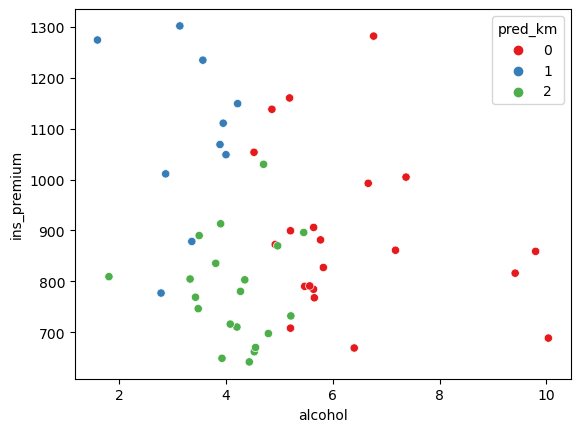

In [31]:
sns.scatterplot(data=df_pred, x= 'alcohol', y='ins_premium', hue='pred_km', palette='Set1')

### Model Interpretation

## [ ] Grouping Variables with `PCA()`

You need to group the original variables of the `DataFrame` in to components so that the groups are clearly separated from each other when we visualize it:

![](src/pca.png)

### Transform Data to Components

`PCA()` is another technique used to transform data.

How has the data been manipulated so far?

1. Original Data `df_crashes`

In [18]:
df_crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
...,...,...,...,...,...,...,...
WI,13.8,4.968,4.554,5.382,11.592,670.31,106.62
WY,17.4,7.308,5.568,14.094,15.660,791.14,122.04


2. Normalized Data `df_scaled`

In [19]:
df_scaled

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,0.737446,1.168148,0.439938,1.002301,0.277692,-0.580083,0.430514
AK,0.565936,1.212695,-0.211311,0.608532,0.807258,0.943258,-0.022900
...,...,...,...,...,...,...,...
WI,-0.487627,-0.015114,-0.194372,-1.834714,-0.647305,-1.227190,-1.133459
WY,0.394425,1.156135,0.397884,0.116657,0.444019,-0.542754,-0.506406


3. Principal Components Data `df_pca` (now)

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA()

In [34]:
pca.fit(X=df_scaled)

PCA()

In [37]:
data_pca= pca.transform(X=df_scaled);

In [45]:
colums_pca= [f'PC{i}' for i in list(range (1,8))]

In [48]:
df_pca = pd.DataFrame(data_pca, index=df_crashes.index, columns=colums_pca)

### Visualize Components & Clusters

In [47]:
import plotly.express as px

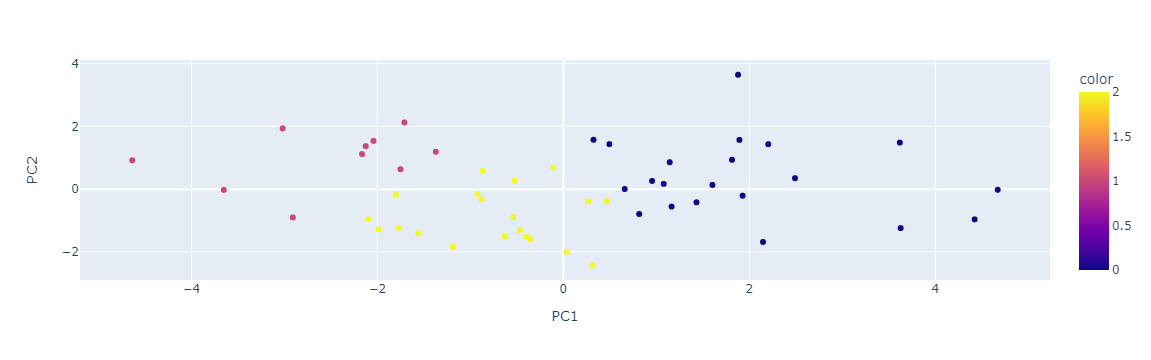

In [50]:
px.scatter(data_frame=df_pca, x='PC1', y='PC2', color=df_pred.pred_km)

## [ ] Explained Variance Ratio

## [ ] Relationship between Original Variables & Components

### Loading Vectors

### Correlation Matrix

### [ ] Calculating One PCA Value

## [ ] PCA & Cluster Interpretation

### Biplot

## Conclusion

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.